### Chemical Potential Sample Code

### Theoretical Explanations
1. From the Gusakov paper, at zero temperature, we have the following relationship between the chemical potential and number density of baryons
$$
    \sum_k \mu_k Y_{ik} = n_i
$$
where $Y_{ik}$ is the relativistic entrainment matrix given in the $\sigma-\omega-\rho$ model by
$$
Y_{i k}= \frac{n_{i}}{m_{i}^{*}}\left[\delta_{i k}-\frac{g_{\omega i}}{A} \frac{n_{k}}{m_{k}^{*}}\left(\frac{g_{\omega k}}{m_{\omega}^{2}} a_{22}-\frac{g_{\rho k} I_{3 k}}{m_{\rho}^{2}} a_{12}\right)\right. 
\left.-\frac{g_{\rho i} I_{3 i}}{A} \frac{n_{k}}{m_{k}^{*}}\left(\frac{g_{\rho k} I_{3 k}}{m_{\rho}^{2}} a_{11}-\frac{g_{\omega k}}{m_{\omega}^{2}} a_{21}\right)\right]
$$
with $a_{ij}$ and $A$ given by 
$$
a_{11}=1+\sum_{i} \frac{g_{\omega i}^{2}}{m_{\omega}^{2}} \frac{n_{i}}{m_{i}^{*}} \\
a_{12}=\sum_{i} \frac{g_{\omega i} g_{\rho i} I_{3 i}}{m_{\omega}^{2}} \frac{n_{i}}{m_{i}^{*}} \\
a_{21}=\sum_{i} \frac{g_{\omega i} g_{\rho i} I_{3 i}}{m_{\rho}^{2}} \frac{n_{i}}{m_{i}^{*}} \\
a_{22}=1+\sum_{i} \frac{g_{\rho i}^{2} I_{3 i}^{2}}{m_{\rho}^{2}} \frac{n_{i}}{m_{i}^{*}} \\
A=a_{11} a_{22}-a_{12} a_{21}
$$
The $Y_{ik}$ matrix elements are dependent on $n_B$ via the effective masses defined as
$$
    m_i^* = \sqrt{p_f^2 + (m_i - g_{\sigma i}\sigma)^2}
$$
where $\sigma(n_B)$ (the exact dependency is unknown to me atm)
and we see then that $\mu_i$ is dependent on both $n_i$ and $n_B$. From this relation, we can solve for $\mu_i(n_j,n_B)$. 
    - For our purpose, considering just protons, neutrons, and Lambda hyperon, we have
    $$
        \mu_n Y_{nn} + \mu_p Y_{np} + \mu_\Lambda Y_{n\Lambda} = n_n\\
        \mu_n Y_{pn} + \mu_p Y_{pp} + \mu_\Lambda Y_{p\Lambda} = n_p\\
        \mu_n Y_{\Lambda n} + \mu_p Y_{\Lambda p} + \mu_\Lambda Y_{\Lambda\Lambda} = n_\Lambda 
    $$ 
    which in matrix form is 
    $$
        \begin{pmatrix}
            Y_{nn} &Y_{np} &Y_{n\Lambda}\\
            Y_{pn} &Y_{pp} &Y_{p\Lambda}\\
            Y_{\Lambda n} &Y_{\Lambda p} &Y_{\Lambda\Lambda}
        \end{pmatrix}
        \begin{pmatrix} 
            \mu_n\\
            \mu_p\\
            \mu_\Lambda
        \end{pmatrix}
         = 
         \begin{pmatrix}
         n_n\\
         n_p\\
         n_\Lambda 
         \end{pmatrix}
    $$
    so we can solve for $\mu_i$ by inverting this $Y_{ij}$ matrix. 
    - An issue to then consider is the fact that the $n_i$ are not independent. We have two conditions: Baryon number conservation and charge conservation 
    $$
        n_B = n_p + n_n + n_\Lambda\\
        n_p = n_e + n_\mu 
    $$
    so then we have as our independent variables: $n_B, n_\Lambda, n_e, n_\mu$ with $n_n$ and $n_p$ being the dependent variables. Then, we'd have to solve this matrix equation/set of linear equations with this in mind... 
    - Another issue is that we have to treat the Leptons separately and then we have an additional constraint due to extra muons. Could consider no muons for now. Would have to think about how to determine the electron fraction next then in this model.

2. Next, we can take the partial derivatives, which we probably have to do numerically. Apply the standard partial derivative routine. 

3. With partial derivatives, can solve for $dx_i/dn_i$ which we can solve for in terms of chemical potential partial derivatives via Mathematica. 

4. Finally, insert into speed of sound difference expression.
$$
    
$$

### Code Structure/Explanations
1. From the Gusakov paper, there's a plot of $Y_{ik}$ as a function of $n_B$. For now, we just extract the dependency via a curve-extractor tool and store the numerical values in an array and import the data. Note that these are normalized so we need to multiply through by 
$$
    Y = \frac{3n_0}{\mu_n(3n_0)} = 2.48 \times 10^{41}\text{erg}^{-1}\text{cm}^{-3}
$$
We clean up the data and "align" the points as a function of $n_B$ (via interpolation) so that in the corresponding data matrix, for a given row, we have values for the $Y_{ik}$ matrix elements for a fixed value of $n_B$.
    - For now, we just consider n,p,e, Lambda matter with no muons. 

2. Likewise, we'll need the particle fractions (equivalently the particle densities) but for now we just extract this data dependency on $n_B$ from a plot in Glendenning 1985. Other issues include the fact that this data includes other particles so that $n_B != n_n + n_p + n_\Lambda$. Anyways, we do the same, cleaning and aligning the points as a function of $n_B$. 

3. Next, we calculate the partial derivatives of the chemical potential. We have a data matrix and apply a finite difference scheme to a given column.

4. Next, we calculate $dx_i/dn_B$. 
    - First, would need to get the $\tilde{\mu}_i$ stuff. 
    
5. Finally, we can just insert into the speed

#### Declaring initial things 

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate as int

def sqrt(n):
    return np.sqrt(n)

def ln(n):
    return np.log(n)

pi = np.pi

hc = 197.33; 

Reading in data from csv

In [50]:
nn_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/nn.csv', header=None, names = ['n_B','nn'])
np_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/np.csv', header=None, names = ['n_B','np'])
pp_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/pp.csv', header=None, names = ['n_B','pp'])
plambda_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/plambda.csv', header=None, names = ['n_B','plambda'])
nlambda_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/nlambda.csv', header=None, names = ['n_B','nlambda'])
lambda_lambda_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/lambda_lambda.csv', header=None, names = ['n_B','nlambda'])

Interpolate the data and write out all the data as uniform functions of $n_B$.
1. First, convert dataframe to numpy array and select out first and second column as X and Y data
2. Call interpolation function which defines a new function that returns interpolated values
3. Collect new data into Dataframe

In [54]:
nn = nn_matrix.to_numpy()
nn_x = nn[:,0]
nn_y = nn[:,1]
nn_f = int.interp1d(nn_x, nn_y)

np = np_matrix.to_numpy()
np_x = np[:,0]
np_y = np[:,1]
np_f = int.interp1d(np_x, np_y)

pp = pp_matrix.to_numpy()
pp_x = pp[:,0]
pp_y = pp[:,1]
pp_f = int.interp1d(pp_x, pp_y)

plambda = plambda_matrix.to_numpy()
plambda_x = plambda[:,0]
plambda_y = plambda[:,1]
plambda_f = int.interp1d(plambda_x, plambda_y)

nlambda = nlambda_matrix.to_numpy()
nlambda_x = nlambda[:,0]
nlambda_y = nlambda[:,1]
nlambda_f = int.interp1d(nlambda_x, nlambda_y)

lambda_lambda = lambda_lambda_matrix.to_numpy()
lambda_lambda_x = lambda_lambda[:,0]
lambda_lambda_y = lambda_lambda[:,1]
lambda_lambda_f = int.interp1d(lambda_lambda_x, lambda_lambda_y)

In [102]:
nb_array = np.linspace(0.083, 0.59, 100)

nn_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    nn_vals[j] = nn_f(i)
    j = j + 1
    
np_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    np_vals[j] = np_f(i)
    j = j + 1

pp_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    pp_vals[j] = pp_f(i)
    j = j + 1

plambda_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    if i < 0.31:
        j = j + 1
        continue
    else:
        plambda_vals[j] = plambda_f(i)
        j = j + 1

nlambda_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    if i < 0.31:
        j = j + 1
        continue
    else:
        nlambda_vals[j] = nlambda_f(i)
        j = j + 1

lambda_lambda_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    if i < 0.31:
        j = j + 1
        continue
    else:
        lambda_lambda_vals[j] = lambda_lambda_f(i)
        j = j + 1

In [115]:
data_matrix = np.array([nb_array,nn_vals,np_vals, pp_vals, plambda_vals, nlambda_vals, lambda_lambda_vals])
data_matrix = np.transpose(data_matrix)
Y = pd.DataFrame(data_matrix, columns = ['nb','Ynn', 'Ynp', 'Ypp', 'Yplambda', 'Ynlambda', 'Ylambdalambda'])
Y

,nb,Ynn,Ynp,Ypp,Yplambda,Ynlambda,Ylambdalambda
0,0.083000,0.209136,-0.003504,0.005725,0.000000,0.000000,0.000000
1,0.088121,0.220692,-0.004627,0.007629,0.000000,0.000000,0.000000
2,0.093242,0.232465,-0.002028,0.008986,0.000000,0.000000,0.000000
3,0.098364,0.244203,-0.002284,0.009532,0.000000,0.000000,0.000000
4,0.103485,0.256268,-0.004008,0.011435,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
95,0.569515,0.810964,-0.093239,0.487425,-0.051606,-0.083212,0.322597
96,0.574636,0.815069,-0.094436,0.492966,-0.053516,-0.085145,0.330288
97,0.579758,0.818307,-0.095143,0.498503,-0.055904,-0.087513,0.337548
98,0.584879,0.821949,-0.096094,0.504041,-0.057337,-0.088757,0.345088


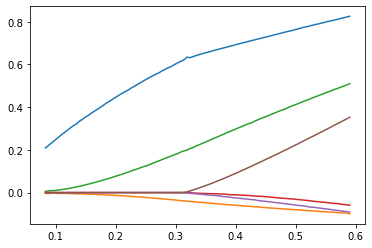

In [101]:
plt.plot(nb_array, nn_vals)
plt.plot(nb_array, np_vals)
plt.plot(nb_array, pp_vals)
plt.plot(nb_array, plambda_vals)
plt.plot(nb_array, nlambda_vals)
plt.plot(nb_array, lambda_lambda_vals)
plt.show()

At this stage, we need to solve for the chemical potentials in terms of the various number densities. 
1. Can do this analytically via Mathematica to get explicit expressions, take those expressions and write in functions. Would get quickly messy for higher dimensions though. 
$$
    \mu_n = 
  \frac{-n_p Y_{\text{n$\Lambda $}} Y_{\text{p$\Lambda $}}+n_{\Lambda } Y_{\text{n$\Lambda
   $}} Y_{\text{pp}}+n_p Y_{\text{np}} Y_{\Lambda \Lambda }-n_{\Lambda } Y_{\text{np}}
   Y_{\text{p$\Lambda $}}+n_n Y_{\text{p$\Lambda $}}^2-n_n Y_{\text{pp}} Y_{\Lambda
   \Lambda }}{Y_{\text{n$\Lambda $}}^2 Y_{\text{pp}}+Y_{\text{nn}} Y_{\text{p$\Lambda
   $}}^2-Y_{\text{nn}} Y_{\text{pp}} Y_{\Lambda \Lambda }-2 Y_{\text{n$\Lambda $}}
   Y_{\text{np}} Y_{\text{p$\Lambda $}}+Y_{\text{np}}^2 Y_{\Lambda \Lambda }}
$$
2. Can do this numerically. Write a function that numerically solves the system of equations (probably iteratively), would be more efficient and easierly generalizable. Would have to note the values for $n_i$ being evaluated at. 

3. Still need to incorporate dependencies. 


This is a problem that will need to be dealth with as well. But for now, a short work around (not sure if valid), but take and extract the particle fractions (as a function of $n_B$) from Glendenning 1985 and import as csv. Have to perform same steps of cleaning the data and "standardizing" via interpolation. 

In [103]:
xp_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/proton_fraction.csv', header=None, names = ['n_B','xp'])
xe_matrix = xp_matrix # assume no muons for now 
xn_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/neutron_fraction.csv', header=None, names = ['n_B','xn'])
xL_matrix = pd.read_csv(r'/Users/vinhtran/Chemical_Potential/Lambda_fraction.csv', header=None, names = ['n_B','xL'])

In [104]:
# converts dataframe to numpy array
xp = xp_matrix.to_numpy()
xp_x = xp[:,0]    # extracts first column and stores into 1-d array, nB values
xp_y = xp[:,1]    # extracts second column and stores into 1-d array, Xp values
xp_f = int.interp1d(xp_x, xp_y)  # declare interpolation function from this data 

xn = xn_matrix.to_numpy()
xn_x = xn[:,0]
xn_y = xn[:,1]
xn_f = int.interp1d(xn_x, xn_y)

xe_f = xp_f

xL = xL_matrix.to_numpy()
xL_x = xL[:,0]
xL_y = xL[:,1]
xL_f = int.interp1d(xL_x, xL_y)

In [111]:
nb_array = np.linspace(0.083, 0.59, 100)

xp_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    xp_vals[j] = xp_f(i)*i
    j = j + 1

xe_vals = xp_vals 
    
xn_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    xn_vals[j] = xn_f(i)*i
    j = j + 1

xL_vals = np.zeros(100, dtype = 'float')
j = 0
for i in nb_array:
    if i < 0.34:
        j = j + 1
        continue
    else:
        xL_vals[j] = xL_f(i)*i
        j = j + 1

In [113]:
fraction_matrix = np.array([nb_array,xp_vals, xe_vals, xn_vals, xL_vals])
fraction_matrix = np.transpose(fraction_matrix)
fraction = pd.DataFrame(fraction_matrix, columns = ['nb','np', 'ne', 'nn', 'nL'])
fraction

,nb,np,ne,nn,nL
0,0.083000,0.002433,0.002433,0.082564,0.000000
1,0.088121,0.002910,0.002910,0.085411,0.000000
2,0.093242,0.003232,0.003232,0.090174,0.000000
3,0.098364,0.003729,0.003729,0.095122,0.000000
4,0.103485,0.004144,0.004144,0.098997,0.000000
...,...,...,...,...,...
95,0.569515,0.137630,0.137630,0.244255,0.097097
96,0.574636,0.138868,0.138868,0.243958,0.099794
97,0.579758,0.140105,0.140105,0.241916,0.103605
98,0.584879,0.141343,0.141343,0.241532,0.106318


#### Immediate issue to note is that we extracted the points from a plot that included other particles as well, so the fractions don't match up that well, ie, nB != xp + xn + xL...

### Attempt at solving for chemical potentials numerically as a function of baryon density nB
1. For a fixed value $n_B$, we have all the matrix elements $Y_{ij}$ numerically and the number densities $n_i$. So in the following we iterate through list of $n_B$ values and solve for $\mu_i$ by solving the matrix equation/system of linear equations.

In [135]:
chem_pot = np.zeros((100,3), dtype='float')

for i in range(100):
    if Y.loc[i].at['nb'] < 0.35:
        Y_matrix = np.array([[Y.loc[i].at["Ynn"], Y.loc[i].at["Ynp"]],\
                         [Y.loc[i].at["Ynp"], Y.loc[i].at["Ypp"]]], dtype='float')
        n_matrix = np.array([fraction.loc[i].at["nn"], fraction.loc[i].at["np"]], dtype = 'float')
        
        solution = np.linalg.solve(Y_matrix, n_matrix)
        for j in range(2):
            chem_pot[i,j] = solution[j]
    else: 
        # construct Y matrix
        Y_matrix = np.array([[Y.loc[i].at["Ynn"], Y.loc[i].at["Ynp"], Y.loc[i].at["Ynlambda"]],\
                         [Y.loc[i].at["Ynp"], Y.loc[i].at["Ypp"], Y.loc[i].at["Yplambda"]],\
                         [Y.loc[i].at["Ynlambda"], Y.loc[i].at["Yplambda"], Y.loc[i].at["Ylambdalambda"]]], dtype='float')
    
        # construct n_i matrix
        n_matrix = np.array([fraction.loc[i].at["nn"], fraction.loc[i].at["np"], fraction.loc[i].at["nL"]])
    
        # solve 
        solution = np.linalg.solve(Y_matrix, n_matrix)
        for j in range(3):
            chem_pot[i,j] = solution[j]

chem_pot

array([[0.40606477, 0.67336993, 0.        ],
       [0.4000958 , 0.6240664 , 0.        ],
       [0.39181193, 0.44811782, 0.        ],
       [0.39406436, 0.48566457, 0.        ],
       [0.39413355, 0.50055104, 0.        ],
       [0.39341172, 0.45146648, 0.        ],
       [0.39502431, 0.42912957, 0.        ],
       [0.39513803, 0.40229359, 0.        ],
       [0.39583013, 0.40251192, 0.        ],
       [0.39606589, 0.39132976, 0.        ],
       [0.3999297 , 0.41045675, 0.        ],
       [0.39898358, 0.40993813, 0.        ],
       [0.39979923, 0.39556877, 0.        ],
       [0.3988734 , 0.39413922, 0.        ],
       [0.4024537 , 0.3911075 , 0.        ],
       [0.40311468, 0.38432462, 0.        ],
       [0.40335812, 0.37252255, 0.        ],
       [0.40632452, 0.380697  , 0.        ],
       [0.4082665 , 0.37377833, 0.        ],
       [0.40771316, 0.36437223, 0.        ],
       [0.40442537, 0.36873397, 0.        ],
       [0.40816191, 0.35889089, 0.        ],
       [0.

### Append everything together 
1. Collect everything together into a single matrix/data frame

### Calculate the Partial Derivatives

In [131]:
def partial

0.0

### Final Comments and stuff
1. The general structure from the Gusakov paper holds great potential for extending this project to not only other composition of particles but also other models/equations of states that include more interactions. There might be a way to write an object oriented code that makes this extension straight forward.